In [1]:
import pickle
outcomes_file = open("intermediate outputs/second evaluation - outcomes description new.pkl", "rb")
outcomes = pickle.load(outcomes_file)

In [2]:
outcomes

{'A.4_Dike Investment Costs': array([18144080.21111   , 18144080.21111   , 18144080.21111   , ...,
        15444563.06553661, 15444563.06553661, 15444563.06553661]),
 'A.4_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.4_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.5_Dike Investment Costs': array([1.72424397e+08, 1.72424397e+08, 1.72424397e+08, ...,
        3.03515260e+07, 3.03515260e+07, 3.03515260e+07]),
 'A.5_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.5_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'Expected Evacuation Costs': array([0., 0., 0., ..., 0., 0., 0.]),
 'RfR Total Costs': array([1.3166e+09, 1.3166e+09, 1.3166e+09, ..., 1.6386e+09, 1.6386e+09,
        1.6386e+09]),
 'Other.Dikes_Expected Annual Damage': array([       0.        ,        0.        ,        0.        , ...,
        71360515.7412749 ,        0.        , 10426686.01682606]),
 'Other.Dikes_Total Dike Investment Costs': arr

In [3]:
a_file = open("intermediate outputs/step6 - second re-evaluation - outcomes description.pkl", "wb")
pickle.dump(outcomes, a_file)
a_file.close()

In [21]:
import pandas as pd
import numpy as np
import pickle
from problem_formulation import get_model_for_problem_formulation
from ema_workbench import ScalarOutcome
import matplotlib.pyplot as plt

In [2]:
def s_to_n(data, direction):
    mean = np.mean(data)
    std = np.std(data)
    
    if direction==ScalarOutcome.MAXIMIZE:
        return mean/std
    else:
        return mean*std

In [9]:
# import the data
experiments = pd.read_csv("intermediate outputs/step2 - first re-evaluation - experiments description.csv")
experiments = experiments.drop(columns=['Unnamed: 0']) # cleaning

outcomes_file = open("intermediate outputs/step2 - first re-evaluation - outcomes description.pkl", "rb")
outcomes = pickle.load(outcomes_file)

In [16]:
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [19]:
overall_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    
    logical = experiments['policy']==policy
    
    for outcome in dike_model.outcomes:
        value  = outcomes[outcome.name][logical]
        sn_ratio = s_to_n(value, outcome.kind)
        scores[outcome.name] = sn_ratio
    overall_scores[policy] = scores
scores = pd.DataFrame.from_dict(overall_scores).T
scores

,A.4_Dike Investment Costs,A.4_Expected Annual Damage,A.4_Expected Number of Deaths,A.5_Dike Investment Costs,A.5_Expected Annual Damage,A.5_Expected Number of Deaths,Expected Evacuation Costs,RfR Total Costs,Other.Dikes_Expected Annual Damage,Other.Dikes_Total Dike Investment Costs,Other.Dikes_Expected Number of Deaths
0,0.017660,1.655809e+14,2.865059e-05,0.000000,1.122296e+15,8.166110e-04,0.000000e+00,0.0,2.840611e+16,3.005173,0.055007
1,0.000000,2.103628e+14,3.577751e-05,0.000000,1.130927e+15,8.350527e-04,0.000000e+00,0.0,4.246238e+16,0.319022,0.050415
2,0.000000,1.252448e+14,1.919091e-05,0.000000,1.126671e+15,8.405858e-04,0.000000e+00,0.0,4.632287e+16,0.000000,0.051974
3,0.000000,1.096090e+14,1.603741e-05,0.000000,9.950512e+14,7.348886e-04,0.000000e+00,0.0,1.894694e+17,0.000000,0.128737
4,0.017660,1.276854e+14,2.188710e-05,0.000000,1.139661e+15,8.356058e-04,0.000000e+00,0.0,1.299238e+17,0.000000,0.116433
5,0.000000,7.072976e+13,9.926555e-06,0.279813,4.693626e+14,3.577483e-04,0.000000e+00,0.0,1.289481e+17,0.356456,0.093748
6,0.017660,5.740801e+13,1.197309e-07,0.279813,4.949509e+14,5.447840e-06,6.518078e+07,0.0,3.906466e+16,0.319022,0.000649
7,0.000000,7.612761e+13,1.093635e-05,0.279813,7.185515e+14,5.401646e-04,0.000000e+00,0.0,1.792288e+16,0.319022,0.031803
8,0.017660,1.824498e+14,3.321008e-05,0.000000,1.121550e+15,8.303405e-04,0.000000e+00,0.0,4.889465e+16,0.000000,0.069993
9,0.000000,6.754088e+13,9.578326e-06,0.000000,1.089338e+15,8.155626e-04,0.000000e+00,0.0,4.514602e+16,0.319022,0.085828


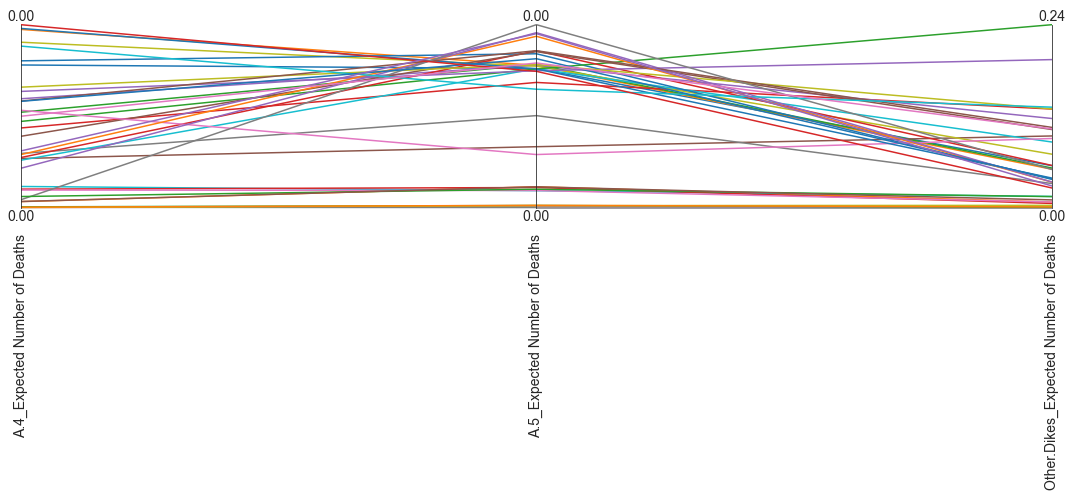

In [23]:
from ema_workbench.analysis import parcoords

data = data = scores.loc[:, [o for o in ['A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths', 'Other.Dikes_Expected Number of Deaths']]]
limits = parcoords.get_limits(data)
plt.rcParams["figure.figsize"] = (15,7)
paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()